## Multiple Linear Regression (MLR). 
### <br> States example

##### Have data sample for American States with parameters:
<br>metro_res -  % population which live in capital district
<br>white  - % white population
<br>hs_grad  - % with avarage aducation
<br>poverty - % poverty
<br>female_house- % woman doesn't work 
#### <br>  Build regression model how level of poverty depends from given parameters.

In [65]:
from pylab import *  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import statsmodels.formula.api as smf

In [25]:
data = pd.read_csv("C:\\Users\\Asus\\Git\\Statistic\\data\\states.csv")  

In [26]:
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [40]:
data.describe()

,metro_res,white,hs_grad,poverty,female_house
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,72.249020,81.719608,86.011765,11.349020,11.633333
std,15.275894,13.897223,3.725998,3.099185,2.356155
min,38.200000,25.900000,77.200000,5.600000,7.800000
25%,60.800000,76.800000,83.300000,9.250000,9.550000
50%,71.600000,85.400000,86.900000,10.600000,11.800000
75%,86.800000,90.250000,88.700000,13.400000,12.650000
max,100.000000,97.100000,92.100000,18.000000,18.900000


**Correlation matrix**

C:\Users\Asus\AppData\Local\Temp\ipykernel_12708\510150037.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True , square=True, cmap='coolwarm' )


<AxesSubplot: >

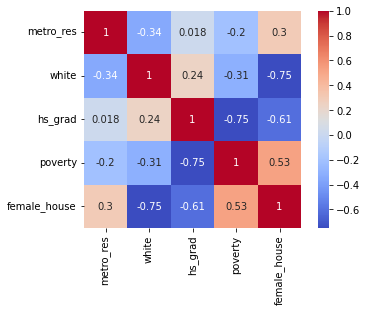

In [27]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True , square=True, cmap='coolwarm' )

##### Scatter pairplot for each parametr

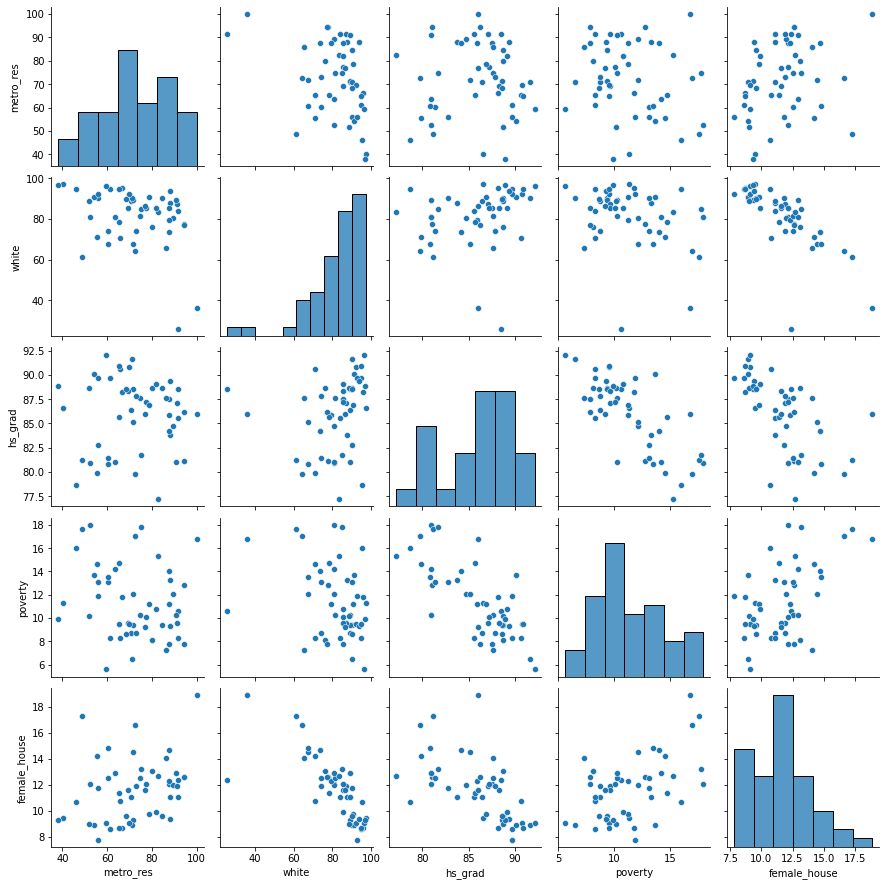

In [28]:
sns.pairplot(data)
plt.show()

**Scatter pairplot with correlation coefficient**
<br>Same result  as above with another plot

C:\Users\Asus\AppData\Local\Temp\ipykernel_12708\2860980468.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().values


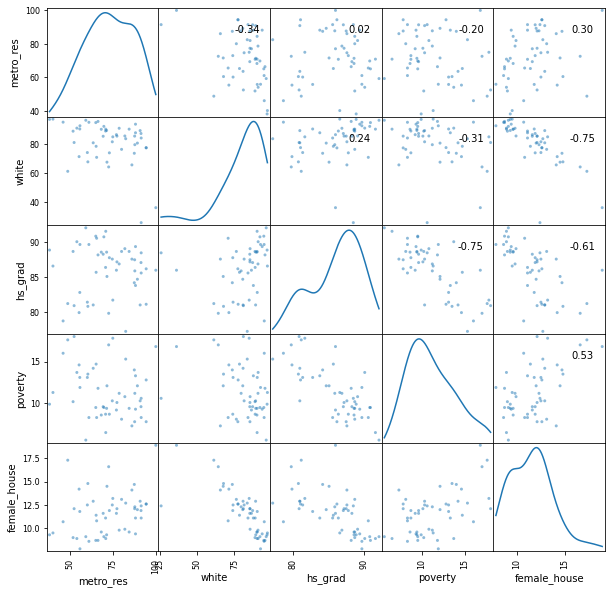

In [36]:
axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

#### 1. At first build linear regression model with one parametr:

In [37]:
lm = smf.ols(formula='poverty ~ hs_grad', data=data).fit()

In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           3.11e-10
Time:                        12:33:15   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.000      51.111      78.451
hs_grad       -0.6212      0.079     -7.862      0.000      -0.780      -0.462
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.653
Skew:                           0.540   Prob(JB):                        0.265
Kurtosis:                       3.289   Cond. No.                     2.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion
<br> **coef = -0.62** - means negative relationship between respone (poverty) and explanatory variable (hs_grad)
<br> **p-value = 0.000**  - means that coeficient statistically significant
<br> **Increasing variable hs_grad (%education) on 1% leads to decreasing poverty on 0.62 %**
<br> **R-squared:	0.558**  - the proportion of variance in the dependent variable (poverty) that can be explained by the independent variable (hs_grad)

<IPython.core.display.Javascript object>


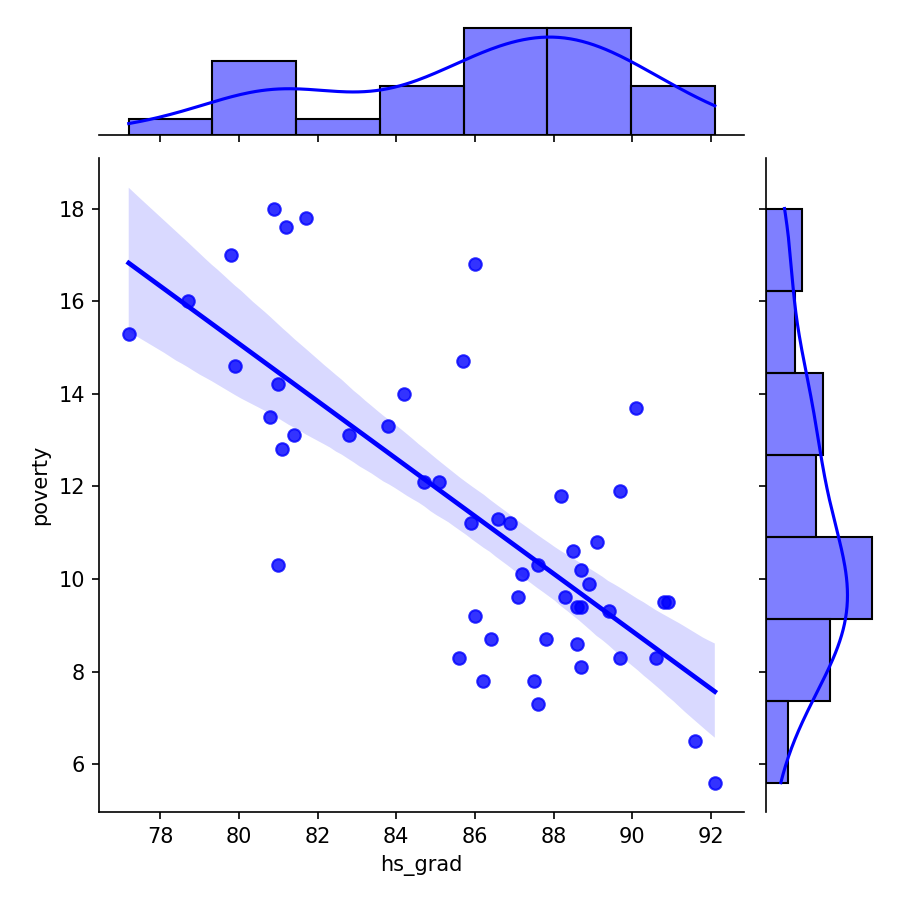

In [63]:
import seaborn as sns
sns.jointplot(x='hs_grad', y='poverty', data=data, kind='reg', color='b')

#### 2. Let's include all 4 variables in multiple linear regression model

Conditions for using multiple linear regreesion
1. linear relationship between an explanatory variables and response variable
2. normal distributaion of residuals
3. homoscedasticity: the variance of residuals is the same for any value of explonatoty variables
4. multicollinearity check (high correlation between explanatory variables isn't allowed)
5. normal distribuation of variables (desirable)

In [33]:
lm = smf.ols(formula='poverty ~ metro_res + white + hs_grad + female_house', data=data).fit()

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           8.88e-10
Time:                        10:54:33   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280      0.000      41.134      91.819
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion
<br> **Multiple R-squared: 0.64** -  the proportion of variance in the dependent variable (poverty) that can be explained by the independent variables. It measures how well a statistical model predicts an outcome
<br> **F-statistic (4,46) = 20.58, p-value < 0.01** -  whole model is statistically significant
<br> p-value for t-statistic for each independent variable allows accapt or reject null hypotesis H0: bi = 0
<br> **Only 2 variables  -  metro_res and hs_grad** - has statistically significat coeficient bi.
<br> Other variables are not significante and have to be excluded from model. 

#### 3. Result model 

In [43]:
lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()

In [58]:
lm.params

Intercept    67.330105
hs_grad      -0.618343
metro_res    -0.038704
dtype: float64

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     35.14
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           3.98e-10
Time:                        14:41:05   Log-Likelihood:                -106.55
No. Observations:                  51   AIC:                             219.1
Df Residuals:                      48   BIC:                             224.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.3301      6.698     10.052      0.000      53.863      80.797
metro_res     -0.0387      0.019     -2.074      0.043      -0.076      -0.001
hs_grad       -0.6183      0.076     -8.084      0.000      -0.772      -0.465
==============================================================================
Omnibus:                        9.730   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.163
Skew:                           0.909   Prob(JB):                       0.0102
Kurtosis:                       4.005   Cond. No.                     2.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Visualize model residuals - distance to plane (in case of 2 variables) insted of line (in case of 1 variable)

<IPython.core.display.Javascript object>


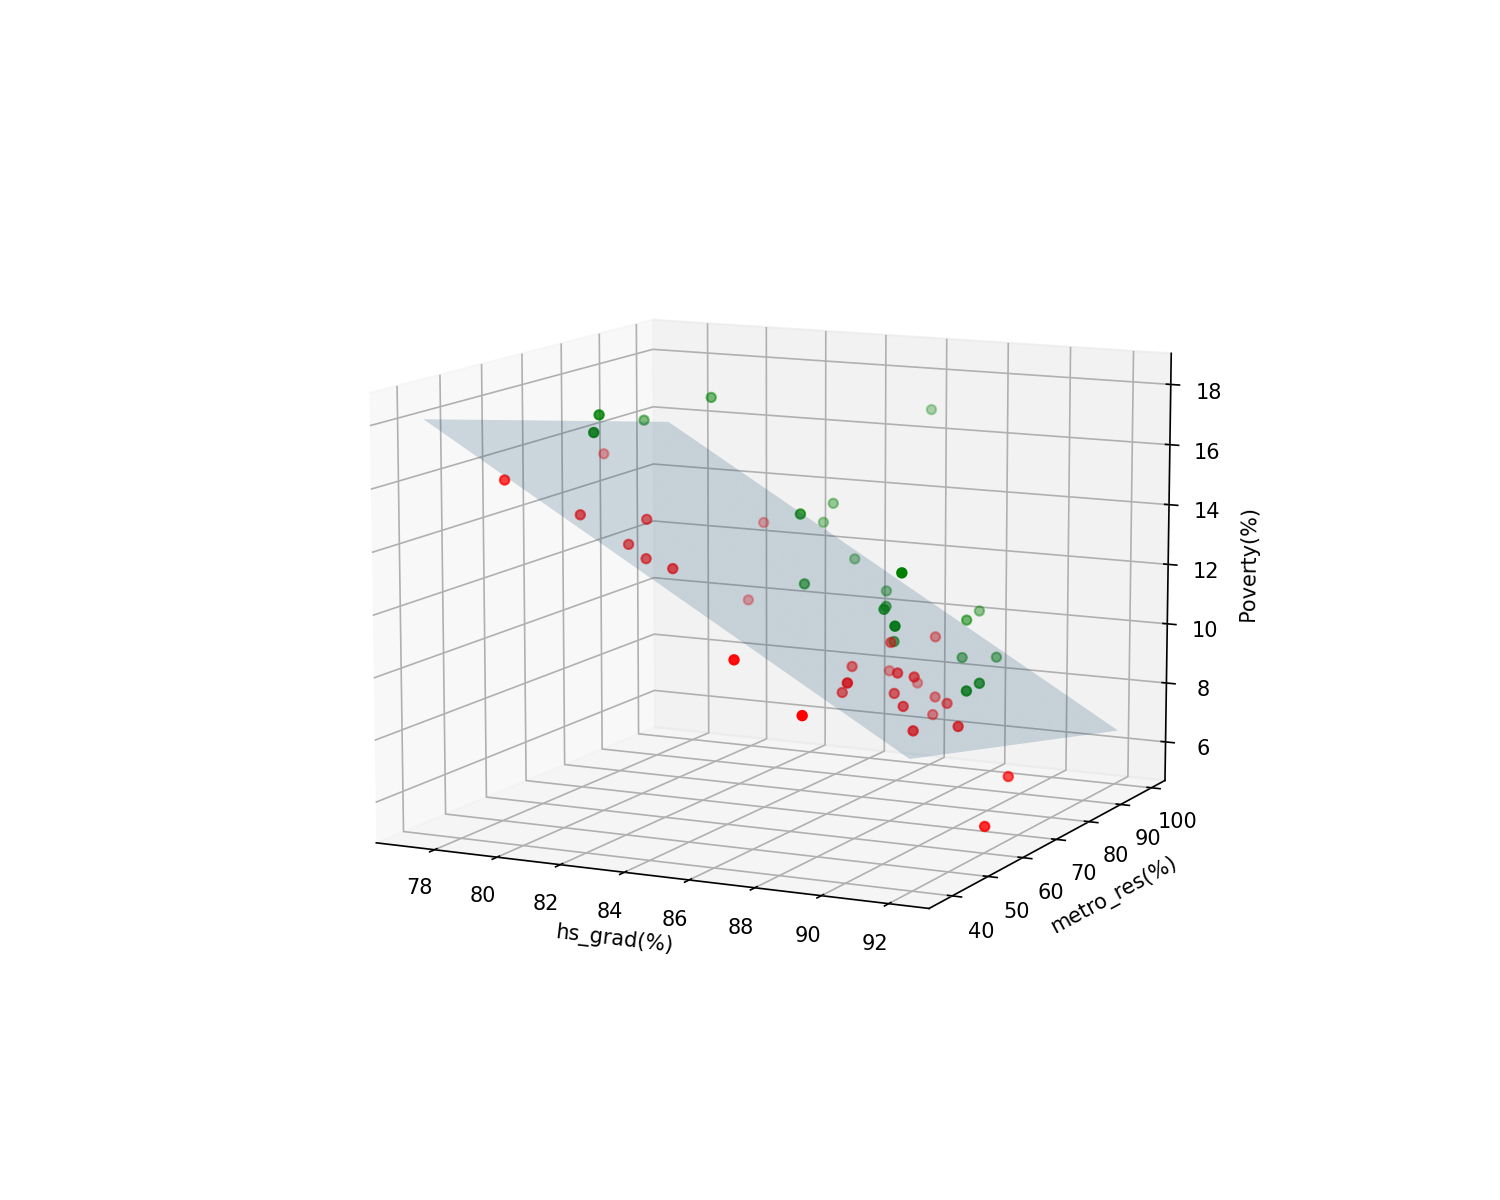

In [123]:
X = data[['hs_grad', 'metro_res']]
y = data['poverty']

lm = smf.ols(formula='poverty ~ hs_grad + metro_res', data=data).fit() #this already have above
def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x + lm.params.metro_res * y

# build plane of model
d1, d2 ,p = list(), list() , list()
for x in np.linspace(min(data.hs_grad), max(data.hs_grad), 100):
    for y in np.linspace(min(data.metro_res), max(data.metro_res), 100):
        d1.append(x)
        d2.append(y)
        p.append(f(x,y))
        
d1, d2 = np.array(d1).reshape(-1, 1), np.array(d2).reshape(-1, 1)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

ax.set_xlabel('hs_grad(%)')
ax.set_ylabel('metro_res(%)')
ax.set_zlabel('Poverty(%)')

ax.plot_trisurf(d1.ravel(), d2.ravel(), np.array(p).ravel(), alpha=0.2) 

# data points above the plane
data_above_serf = data[data.poverty >= f(data.hs_grad, data.metro_res)]
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')

# data points under the plane
data_below_serf = data[data.poverty < f(data.hs_grad, data.metro_res)]
ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')